# T-test

## 1. Independent Samples t-test
it compares the means for two groups.

独立样本T检验仅用于分析两组数据，比如性别，高分组低分组，实验组对照组等。如超过两组比较则使用方差分析



In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

In [2]:
d = {'tea': [12, 12.3, 14.1,6.2,6.9,5,16.2,3.2,4.8,5.9,15,12,11.1], 'water': [11.2, 15.1, 16,7.2,3.1,1.2,5.2,4.1,3.1,11.6,2.1,6.5,9.1]}
df = pd.DataFrame(data=d)
df.head()

,tea,water
0,12.0,11.2
1,12.3,15.1
2,14.1,16.0
3,6.2,7.2
4,6.9,3.1


In [3]:
Mean1=df.tea.mean()
Mean2=df.water.mean()
variance1=df.tea.var()
variance2=df.water.var()
print(Mean1,Mean2)
print(variance1,variance2)
n1=13
n2=13
t_statistic=abs(Mean1-Mean2)/np.sqrt(variance1/n1+variance2/n2)
print(t_statistic)

9.592307692307692 7.346153846153845
19.31076923076923 24.022692307692306
1.2302673092447416


In [4]:
###using modules
ttest_ind(df['tea'], df['water'])
#exactly the same as the above

Ttest_indResult(statistic=1.2302673092447414, pvalue=0.2305199593236282)

## 2. Paired Samples T-Test 

The paired sample t-test is also called dependent sample t-test. It’s an univariate test that tests for a significant difference between 2 related variables. An example of this is if you where to collect the blood pressure for an individual before and after some treatment, condition, or time point. A Paired sample t-test compares means from the same group at different times (say, one year apart). An example of this is if you where to collect the blood pressure for an individual before and after some treatment, condition, or time point.

<b>The hypothesis being test is:</b>

Null hypothesis (H0):ud = 0, which translates to the mean difference between sample 1 and sample 2 is equal to 0.

Alternative hypothesis (HA): ud !=0, which translates to the mean difference between sample 1 and sample 2 is not equal to 0.

If the p-value is less than what is tested at, most commonly 0.05, one can reject the null hypothesis.

配对样本T检验要求两组样本量相等，而独立样本T检验对样本量没有要求

Only can be used for two samples. Three or more samples should use ANOVA.

In order for the paired sample t-test results to be trusted, the following <b>assumptions</b> need to be met:

1. The dependent variable (DV) must be continuous which is measured on an interval or ratio scale


2. The DV should be approximately normally distributed.
    * Testing for normality needs to be conducted on the differences between the two conditions, not the raw values of each condition itself
    * The paired sample t-test is robust to this violation. If there is a violation of normality, as long as it’s not in a major violation the test results can be considered valid.
 
3. The DV should not contain any significant outliers

If any of these assumptions are violated, a different test should be used. An alternative to the paired sample t-test is the Wilcoxon signed-rank Test.

In [5]:
#import modules in need
import pandas as pd
import numpy as np
from scipy import stats
df=pd.read_excel('data_tea.xlsx')  
df.head()


,before,after
0,90,63
1,95,71
2,82,79
3,91,73
4,100,74


### 2.1 Assumption check: outliers

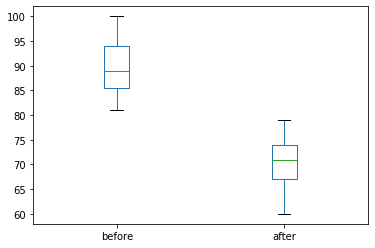

In [6]:
df[['before', 'after']].plot(kind='box')
# This saves the plot as a png file
plt.savefig('boxplot_outliers.png')
#There doesn’t appear to be any significant outliers in the variables.

### 2.2 Assumption Check: Normal Distribution

Remember that for the dependent sample T-test the normality check needs to be conducted on differences between the two scores. There are a few ways one can test this assumption – make a histogram, use a Q-Q plot, and/or use a statistical test. Let’s create a variable for the differences and run through these.

For Q-Q plot method, the data should be on the red line. If it’s not, then it suggests that the data may not be normally distributed.

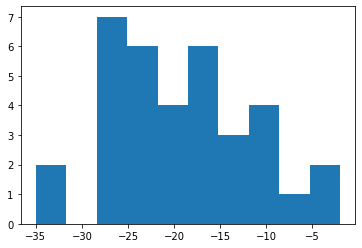

In [7]:
#using histogram
df['difference']=df.after-df.before
plt.hist(df.difference)
plt.show()

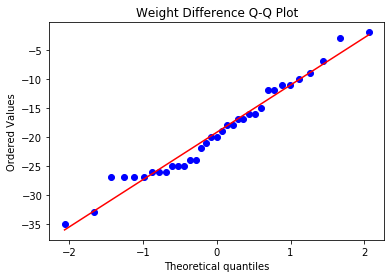

In [8]:
#using Q_Q plot
stats.probplot(df['difference'], plot= plt)
plt.title('Weight Difference Q-Q Plot')
plt.savefig('Weight difference qq plot.png')
#approximately normal distribution
#There is some deviation from normality, but it does not appear to be severe so there is no need to worry. 

In [9]:
# test statistically using the Shapiro-Wilk test for normality
stats.shapiro(df['difference'])
#The test was non-significant. Therefore, the difference between the two conditions is normally distributed. 
#If this test were to be significant, an appropriate alternative to use would be the Wilcoxon signed-rank Test.

(0.9693166017532349, 0.424749493598938)

### 2.3 T-Test for paired samples

In [10]:
df_before=df.before
df_after=df.after
#stats.ttest_rel() calculates the t-test on TWO RELATED samples of scores, a and b.
stats.ttest_rel(df_before,df_after)

Ttest_relResult(statistic=14.251943400207056, pvalue=6.689075420715747e-16)

## A One sample t-test tests the mean of a single group against a known mean.

In [11]:
from scipy.stats import norm
#generate an array of normal distribution with mean equals 10 and standard deviation 2.
x=norm.rvs(loc=10,scale=2,size=5000)
x.mean()

10.029431401298183

In [12]:
stats.ttest_1samp(x,10)

Ttest_1sampResult(statistic=1.0412173022678812, pvalue=0.29782506025724126)

# ANOVA Example: Analysis of Variance 
Conducting analysis to get ANOVA table=>assumption check=>(if significant) post hoc analysis

方差分析用于定类数据（X）与定量数据（Y）之间的差异分析，例如研究三组学生（X）的智商平均值（Y）是否有显著差异。

如果X为定类，Y为定量；且X分为两组，比如男和女；此时也可使用t检验进行差异对比。T检验与单因素方差分析的区别在于T检验只能对比两组数据的差异。

如果X和Y均为定类数据，想对比差异性，此时需要使用卡方分析。

F值为计算过程值，用于计算P值，通常不需要单独对其进行分析。

Researchpy produces Pandas DataFrames that contain relevant statistical testing information that is commonly required for academic research. The information is returned as Pandas DataFrames to make for quick and easy exporting of results to any format/method that works with the traditional Pandas DataFrame. researchpy is essentially a wrapper that combines various established packages such as pandas, scipy.stats, and statsmodels to get all the standard required information in one method. If analyses were not available in these packages, code was developed to fill the gap.

In [13]:
import pandas as pd
import scipy.stats as stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
    
import matplotlib.pyplot as plt

# Loading data
df = pd.read_csv("https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/difficile.csv")
# df.drop('person', axis= 1, inplace= True)

# Recoding value from numeric to string
df['dose'].replace({1: 'placebo', 2: 'low', 3: 'high'}, inplace= True)
    
# Gettin summary statistics
rp.summary_cont(df['libido'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,libido,15.0,3.466667,1.76743,0.456349,2.487896,4.445437


In [14]:
#  we are really interested in the data by dosing.
rp.summary_cont(df['libido'].groupby(df['dose']))

,N,Mean,SD,SE,95% Conf.,Interval
dose,,,,,,
high,5,5.0,1.581139,0.707107,3.450484,6.549516
low,5,3.2,1.303840,0.583095,1.922236,4.477764
placebo,5,2.2,1.303840,0.583095,0.922236,3.477764


## 1.Getting ANOVA:
There are a few ways this can be done with Python. One is with the stats.f_oneway() method which is apart of the scipy.stats library, and the other is using statsmodels.

### 1.1 ANOVA with scipy.stats

The F-statistic= 5.119 and the p-value= 0.025 which is indicating that there is an overall significant effect of medication on libido. However, we don’t know where the difference between dosing/groups is yet. This is in the post-hoc section.

A thing to note, is that if you are doing this for academic research purposes, this method is missing some of the information that is required for publication. For example, one would need the degrees of freedom, have to calculate the sum of squares, and conduct post-hoc tests by hand.

In [15]:

stats.f_oneway(df['libido'][df['dose'] == 'high'], 
             df['libido'][df['dose'] == 'low'],
             df['libido'][df['dose'] == 'placebo'])


F_onewayResult(statistic=5.11864406779661, pvalue=0.024694289538222603)

### 1.2 ANOVA with statsmodels:

it is a generalized linear model (GLM).

The general input using this method looks like this:

model_name = ols('outcome_variable ~ group1 + group2 + groupN', data=your_data).fit()

In [16]:
results = ols('libido ~ C(dose)', data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 libido   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     5.119
Date:                Fri, 15 May 2020   Prob (F-statistic):             0.0247
Time:                        16:56:03   Log-Likelihood:                -24.683
No. Observations:                  15   AIC:                             55.37
Df Residuals:                      12   BIC:                             57.49
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.0000      0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


Let’s interpret the table. Overall the model is significiant, F(2,12)= 5.12, p = 0.0247. This tells us that there is a significant difference in the group means. 

Looking at the p-values now (P>|t| in the table), we can see the difference between the high dose group and placebo group is significant, p = 0.008, but the difference between the low dose group and high dose group is not, p = 0.065. 

Coming from the ANOVA framework, the information we are really caring about in this table it the F-statistic and it’s corresponding p-value. This tells us if we explained a significant amount of the overall variance.

To test between groups, we need to do some post-hoc testing where we can compare all groups against each other. We are still missing some useful information with this method, we need an ANOVA table.

In [17]:
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table
#typ : str or int {"I","II","III"} or {1,2,3} The type of Anova test to perform. See notes.

,sum_sq,df,F,PR(>F)
C(dose),20.133333,2.0,5.118644,0.024694
Residual,23.600000,12.0,NaN,NaN


Let’s break down this ANOVA table. The dose row is the between groups effect which is the overall experimental effect. The sum of squares for the model (SSM; value 20.133 in the table) is how much variance is explained by our model. The current model explains a significant amount of variance, F(2,12)= 5.12, p < 0.05. The residual row is the unsystematic variation in the data (SSR; also called the unexplained variance; value 23.600 in the table). In this case, the unsystematic variation represents the natural individual differences in libido and natural different reactions to the drug, Difficile.

## 2.CALCULATING MODEL EFFECT SIZE（用于事后多重比较：post hoc analysis）

The effect size tells us how much of an impact the experiment will have in the real world. There are a few different effect sizes one can use: eta squared(Eta2 = SSeffect / SStotal), and omega squared (ω2 = (SSeffect – (dfeffect)(MSerror)) / MSerror + SStotal).

R2 is called eta squared within the ANOVA framework.

Omega squared is considered a better measure of effect size than eta squared because it is unbiased in its calculation. SSM and SSR are biased because they are influenced by the number of values summed to calculated them.


<b>The 3 Sums of Squares:</b>

SST(sum of squares total): 

SSR( sum of squares due to regression):

It is the sum of the differences between the predicted value and the mean of the dependent variable. Think of it as a measure that describes how well our line fits the data.

SSE( sum of squares error):The error is the difference between the observed value and the predicted value.

Mathematically, SST = SSR + SSE.

R^2=SSR/SST

Another thing we need to calculate is the <b>mean squares</b>. The mean squares is desired because it eliminates the bias present in the SSM and SSR, and it is also used to calculate the F-statistic and omega squared.  To calculate the mean squares, one divides the sum of squares (SSM and SSR) by the degrees of freedom respectively.

MSR is the average amount of variance explained by the current model, MSE is the average amount of variance unexplained by the current model. The ratio of MSR to MSE is used to calculate the F-statistic. We don’t need to do this since we already have it, but it’s nice to understand where the numbers come from!

In [18]:
SSR=20.133333
SSE=23.600000

R_squared=SSR/(SSR+SSE)
R_squared

0.4603658495454714

In [19]:
#Mean squares
dfR=2
dfE=12
MSR= SSR/dfR 
MSE=SSE/dfE
print(MSR,MSE)

10.0666665 1.9666666666666668


In [20]:
#calculates the effect sizes mentioned above.
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    #(SSR-dfR*MSE)/(SST+MSE)
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(dose),20.133333,2.0,10.066667,5.118644,0.024694,0.460366,0.354486
Residual,23.600000,12.0,1.966667,NaN,NaN,NaN,NaN


## 3.Assumption Checks/Model Diagnostics


As mentioned earlier, when working with linear regression and ANOVA models, the assumptions pertain to the residuals and not the variables themselves. Using Statsmodels, we can use the diagnostics that is already provided. The default output is not pretty, so often times we can choose to print the model summary as a regression table and look there than use the following code as it’s more readable in the regression table.

The Durban-Watson tests is to detect the presence of autocorrelation (not provided when calling diagnostics this way), Jarque-Bera (jb; jbpv is p-value) tests the assumption of normality, Omnibus (omni; omnipv is p-value) tests the assumption of homogeneity of variance, and the Condition Number (condno) assess multicollinearity. Condition Number values over 20 are indicative of multicollinearity.

If the omnibus test were to be significant, an option on how to handle it would be to use a heteroscedasticity corrected coefficient covariance matrix in the .anova_lm() method. This corrects the calculations to account for the heteroscedasticity present. More information on the method can be found on it’s official documentation page.

In [21]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 libido   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     5.119
Date:                Fri, 15 May 2020   Prob (F-statistic):             0.0247
Time:                        16:56:03   Log-Likelihood:                -24.683
No. Observations:                  15   AIC:                             55.37
Df Residuals:                      12   BIC:                             57.49
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.0000      0

In [22]:
results.diagn

{'jb': 1.1080275776425257,
 'jbpv': 0.574638696944554,
 'skew': 0.19458085550134038,
 'kurtosis': 1.726659006032749,
 'omni': 2.517358660775963,
 'omnipv': 0.2840288872319991,
 'condno': 3.7320508075688767,
 'mineigval': 1.3397459621556138}

#### Other ways to check assumptions

1.Assumption: Homogeneity of Variance(方差齐性检验）
One can use the Levene’s test to test for equal variances between groups. This is apart of the scipy.stats library. The reason I prefer using these methods is that the homogeneity of variance assumption should be checked for each level of the categorical variable. The diagnostic output provided by statsmodels appears to only test it as the whole.

2.Assumption: Normality

The assumption of normality is tested on the residuals as a whole which is how the diagnostic information provided by statsmodels tests the residuals.

现实研究中，数据多数情况下无法到达理想状态。正态性检验要求严格通常无法满足，实际研究中，若峰度绝对值小于10并且偏度绝对值小于3，或正态图基本上呈现出钟形，则说明数据虽然不是绝对正态，但基本可接受为正态分布，此时也可使用方差分析进行分析。

One could use the Jarque-Bera test provided, or one could use Shapiro or others. 

### 3.1 checking homogeneity of variance

In [23]:
#check for homogeneity of Variance
stats.levene(df['libido'][df['dose'] == 'placebo'],
             df['libido'][df['dose'] == 'low'],
             df['libido'][df['dose'] == 'high'])

LeveneResult(statistic=0.11764705882352934, pvalue=0.8900225182757423)

### 3.2 checking normality

In [24]:
# check for Normality with the Shapiro method
#The output is not labelled, but the numbers are the test statistic value followed by the p-value. 
stats.shapiro(results.resid)
#The results from the Shapiro-Wilk test is not statistically significant 
#which indicates that the residuals are normally distributed.

(0.9166916012763977, 0.17146942019462585)

## 4.Post-hoc Testing

The overall model was significant, now to test which groups differ. Deciding which groups to compare should be theory driven. There are a few different techniques that can be used. Each of these techniques have different ways of controlling for familywise error rate. 3 common methods are:

<li>Fisher’s Least Significant Difference (LSD): </li>Take the groups you want to compare and conduct multiple t-tests. <b>This method requires that the ANOVA model be significant.</b> This method is easy, but receives push back since it doesn’t account for familywise error rate. The argument is that since the overall model was significant, one is protected from increasing the familywise error rate.

<li>Bonferroni correction:</li> Take the alpha the ANOVA was tested at, 0.05, then divide it by the number of planned comparisons. In this case, 0.05/3 = 0.0167. A post-hoc test would have to have an alpha level smaller than 0.0167 to be considered significant. To test the groups, conduct multiple t-tests, but set the alpha value to the corrected value. This method is quick, but often considered too conservative.


<li>Tukey’s HSD:</li> Method also controls for familywise error rate with a different method than Bonferroni, and is also considered conservative.

The Tukey HSD post-hoc comparison test controls for type I error and maintains the familywise error rate at 0.05 (FWER= 0.05 top of the table). The group1 and group2 columns are the groups being compared, the meandiff column is the difference in means of the two groups being calculated as group2 – group1, the lower/upper columns are the lower/upper boundaries of the 95% confidence interval, and the reject column states whether or not the null hypothesis should be rejected. Unfortunately, this method currently does not provide the t-statistic so treatment effect size cannot be calculated.

|Method|适用场景|other notation|
|---|---|---|
|LSD|使用最为广泛，检验效能高，对比组别使用时较少|对差异最为敏感|
|Bonferroni correction|对比组别较少时使用|相对较为保守|
|Tukey’s HSD|各组别的样本数量相同时使用|各组别样本相同时使用|


需要注意的是，事后多重比较是基于方差分析基础上进行的，因此首先要满足方差分析确实存在显著性差异，接着才来比较两两的差异。如果本身只有两组数据做比较或者方差分析显示P值大于0.05各个组别之间没有差异性，此时则不需要进行事后检验。



### 4.1  Tukey’s HSD method

In [25]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(df['libido'], df['dose'])
mc_results = mc.tukeyhsd()
print(mc_results)


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2 meandiff p-adj   lower   upper  reject
-----------------------------------------------------
  high     low     -1.8 0.1472 -4.1651  0.5651  False
  high placebo     -2.8 0.0209 -5.1651 -0.4349   True
   low placebo     -1.0 0.5171 -3.3651  1.3651  False
-----------------------------------------------------


### BONFERRONI CORRECTION POST-HOC COMPARISON

In [26]:

#First the corrected p-value needs to be calculated. This can be done using the formula:

pvalueOfComparisons = 0.05/3
print(pvalueOfComparisons)
#Now the t-tests that are conducted have to have a p-value less than 0.01667 in order to be considered significant.

0.016666666666666666


In [27]:
stats.ttest_ind(df['libido'][df['dose'] == 'high'], df['libido'][df['dose'] == 'low'])


Ttest_indResult(statistic=1.963961012123931, pvalue=0.08513507177899203)

In [28]:
stats.ttest_ind(df['libido'][df['dose'] == 'low'], df['libido'][df['dose'] == 'placebo'])

Ttest_indResult(statistic=1.2126781251816647, pvalue=0.2598450452137845)

In [29]:
stats.ttest_ind(df['libido'][df['dose'] == 'high'], df['libido'][df['dose'] == 'placebo'])
#significant

Ttest_indResult(statistic=3.0550504633038926, pvalue=0.015700141250047695)

Using the Bonferroni correction, only the difference between the high dose and placebo groups are significantly different. We can calculate the high dosing’s effect size! To calculate the effect size for the treatment dosing we also need to calculate the degrees of freedom since it’s not provided. A t-test’s effect size indicates whether or not the difference between two groups’ averages is large enough to have practical meaning, whether or not it is statistically significant.
The following equations can be used:

In [34]:
#dof = #_observations_group1 + #_observations_group2 - #_of_groups
dof = 5 + 5 - 2 
#effect size r = square root of (t^2/t^2 + dof)
effet_size_r = np.sqrt(1.213**2/(1.213**2 + dof))
effet_size_r 
#actually don't understand the above code clearly.

0.39414354867502716